<h2 style="color:black; font-weight:bold;">🚗 Used Car Price Prediction</h2>


This project aims to predict the selling price of used cars based on various features such as year, kilometers driven, fuel type, seller type, and more.

We perform Exploratory Data Analysis (EDA) to understand the distribution of the data, discover patterns, and visualize key relationships. Then, we preprocess the dataset by encoding categorical features and splitting the data for model training.

A Random Forest Regressor is trained to predict car prices based on historical data. The model is evaluated using metrics like R² Score and Mean Squared Error (MSE), along with a plot comparing actual vs predicted values.

This notebook is ideal for anyone learning about:

Data Cleaning and Preprocessing

EDA using Matplotlib and Seaborn

Machine Learning Regression models

Real-world use cases in the automobile industry

In [ ]:
# 🚗 Used Car Price Prediction with Visualizations

# 📦 Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [9]:
# 📂 Load Dataset and Show Table
df = pd.read_csv("used_car_data.csv")
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti Swift,2014,350000,50000,Petrol,Individual,Manual,First Owner
1,Hyundai i20,2017,500000,30000,Diesel,Dealer,Manual,Second Owner
2,Honda City,2015,400000,40000,Petrol,Individual,Manual,First Owner
3,Toyota Innova,2012,600000,80000,Diesel,Dealer,Manual,Third Owner
4,Ford Figo,2016,300000,35000,Petrol,Individual,Manual,First Owner


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   year                    5 non-null      int64
 1   selling_price           5 non-null      int64
 2   km_driven               5 non-null      int64
 3   fuel_Petrol             5 non-null      uint8
 4   seller_type_Individual  5 non-null      uint8
 5   owner_Second Owner      5 non-null      uint8
 6   owner_Third Owner       5 non-null      uint8
dtypes: int64(3), uint8(4)
memory usage: 268.0 bytes


In [20]:
df.describe()

,year,selling_price,km_driven,fuel_Petrol,seller_type_Individual,owner_Second Owner,owner_Third Owner
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,2014.800000,430000.000000,47000.000000,0.600000,0.600000,0.200000,0.200000
std,1.923538,120415.945788,19874.606914,0.547723,0.547723,0.447214,0.447214
min,2012.000000,300000.000000,30000.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,350000.000000,35000.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,400000.000000,40000.000000,1.000000,1.000000,0.000000,0.000000
75%,2016.000000,500000.000000,50000.000000,1.000000,1.000000,0.000000,0.000000
max,2017.000000,600000.000000,80000.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df.isnull().sum()

year                      0
selling_price             0
km_driven                 0
fuel_Petrol               0
seller_type_Individual    0
owner_Second Owner        0
owner_Third Owner         0
dtype: int64

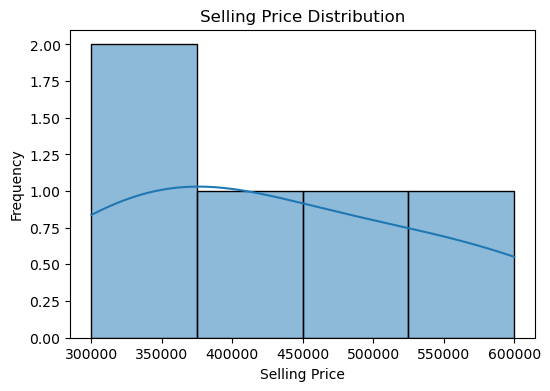

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df['selling_price'], kde=True)
plt.title('Selling Price Distribution')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


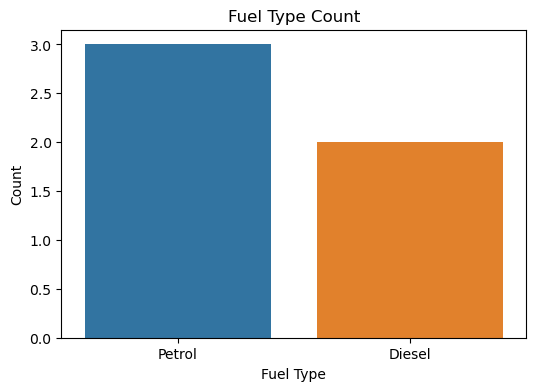

In [11]:
# 🔋 Fuel Type Count
plt.figure(figsize=(6,4))
sns.countplot(x='fuel', data=df)
plt.title('Fuel Type Count')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()


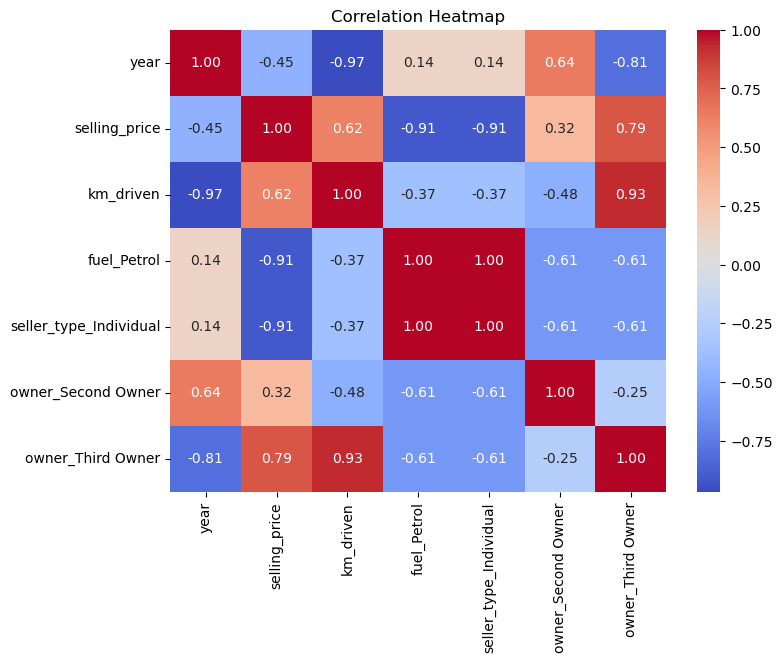

In [12]:
# 🔥 Correlation Heatmap
# Convert categorical features
df_encoded = pd.get_dummies(df.drop("name", axis=1), drop_first=True)

plt.figure(figsize=(8,6))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [16]:
# Drop 'name' column
df = df.drop('name', axis=1)

# Convert categorical columns
df = pd.get_dummies(df, drop_first=True)
df.head()

,year,selling_price,km_driven,fuel_Petrol,seller_type_Individual,owner_Second Owner,owner_Third Owner
0,2014,350000,50000,1,1,0,0
1,2017,500000,30000,0,0,1,0
2,2015,400000,40000,1,1,0,0
3,2012,600000,80000,0,0,0,1
4,2016,300000,35000,1,1,0,0


In [15]:
# 🧠 Model Building: Random Forest Regressor

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

X = df_encoded.drop("selling_price", axis=1)
y = df_encoded["selling_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.2f}")
print(f"MSE: {mse:.2f}")


R² Score: nan
MSE: 10302250000.00


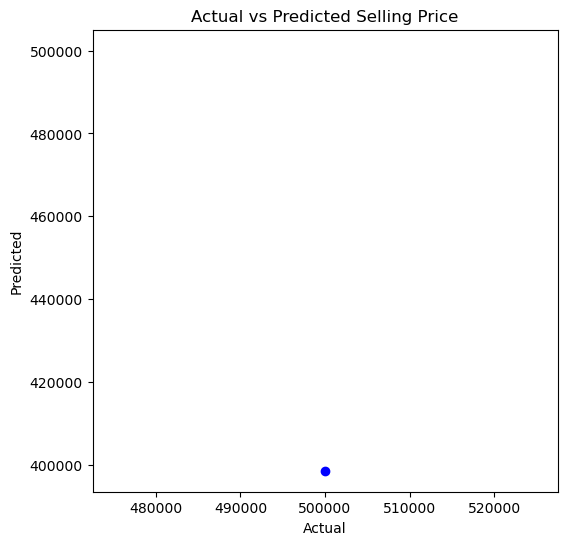

In [14]:
# 📈 Plot Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, c='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Selling Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()
